#Case Study: House Price

The dataset represents a synthetic collection of house-related features and their corresponding prices. It contains 1000 samples, with each sample having the following features:

- Size: The size of the house
- Bedrooms: The number of bedrooms in the house
- Bathrooms: The number of bathrooms in the house
- Location: A feature representing the location of the house
- YearBuilt: The year the house was built
- RoofType: The type of roof on the house
- Price: The price of the house

## Load and Explore the Dataset

In [16]:
import pandas as pd
df = pd.read_csv('/content/house_prices_dataset.csv')
df

,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
0,-0.325611,0.257199,0.007880,-0.164335,-0.240665,0.212093,-16.984913
1,-0.202193,1.277665,0.547097,-0.217681,-0.591571,1.098777,24.031693
2,-2.153731,0.975713,0.685858,0.446982,0.000756,-0.638586,57.305959
3,-0.939880,-1.304470,0.366598,-0.513867,0.669673,-1.059214,-81.049670
4,-0.570351,1.223083,0.352505,-1.820603,-0.258854,0.270057,-127.396000
...,...,...,...,...,...,...,...
995,NaN,0.689164,-0.273729,0.149598,-0.683634,0.097827,13.634300
996,-0.564079,-1.021233,0.243801,-1.280304,0.708356,0.872457,-138.161669
997,-0.981166,-1.725807,1.194109,-0.464404,-0.677565,0.462061,-94.896020
998,NaN,1.158596,0.963376,0.822060,-0.820682,1.896793,133.087712


Let's explore the dataset to better know what we're dealing with

## Deeper Exploration

In [ ]:
# Question 1:
# Get the shape of the dataset
df.shape


(1000, 7)

In [ ]:
# Check the data types of the columns
df.dtypes

Size         float64
Bedrooms     float64
Bathrooms    float64
Location     float64
YearBuilt    float64
RoofType     float64
Price        float64
dtype: object

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Question 2:
# Check for missing values
missing_values = df.isnull().any()
print("Missing Values:\n", missing_values)
# Drop rows with NaN values
df = df.dropna()
# Check for missing values again
print("Missing values:\n", df.isnull().sum())

Missing Values:
 Size          True
Bedrooms      True
Bathrooms    False
Location     False
YearBuilt    False
RoofType     False
Price        False
dtype: bool
Missing values:
 Size         0
Bedrooms     0
Bathrooms    0
Location     0
YearBuilt    0
RoofType     0
Price        0
dtype: int64


This function sns.pairplot() creates scatter plots for each numerical feature (Size, Bedrooms, Bathrooms, Location, YearBuilt) against the target variable (Price).

In [18]:
df.describe()

,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,-0.009047,-0.004061,0.010131,-0.063866,-0.001070,0.046658,-5.801303
std,1.033124,0.972833,1.010353,1.007802,1.007022,0.988455,106.479727
min,-3.176704,-2.635748,-3.019512,-3.241267,-2.991136,-2.848543,-378.482528
25%,-0.667780,-0.627734,-0.668143,-0.762519,-0.656894,-0.589452,-77.265468
50%,-0.020099,-0.013838,0.033903,-0.054894,0.019344,0.040592,-4.906227
75%,0.604515,0.642723,0.652323,0.632408,0.673181,0.665369,66.442292
max,3.926238,3.098299,3.243093,3.152057,3.193108,3.852731,352.382735


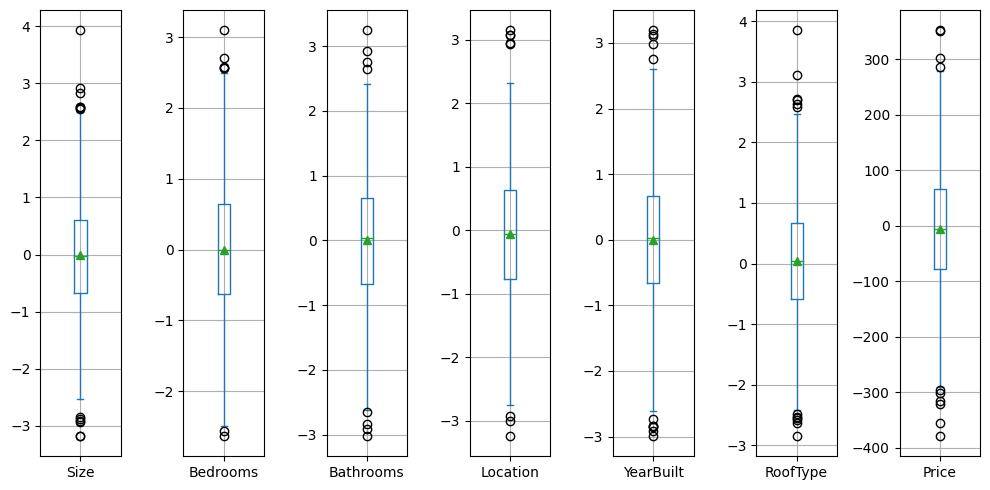

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Question 3:
# Create plots to better understand the data.
ax = df.plot.box(figsize=(10, 5), showmeans=True, grid=True, subplots=True)
plt.tight_layout()
plt.show()


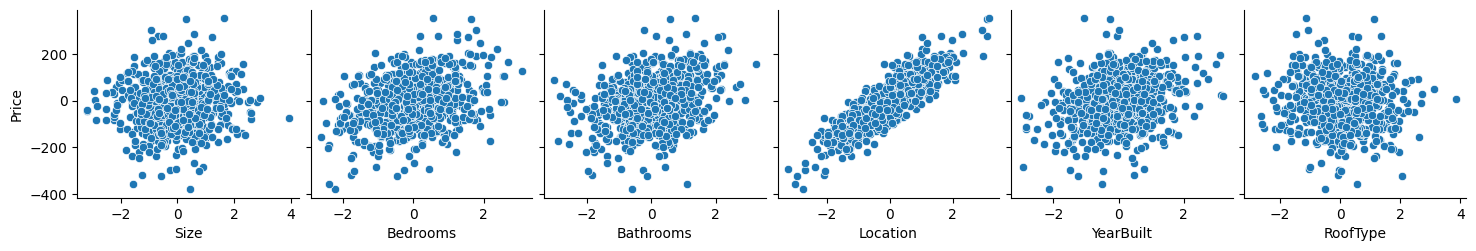

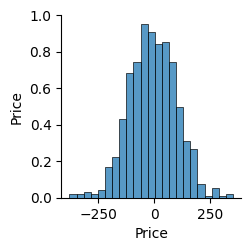

In [ ]:
for i in range(0, len(df.columns), 6):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+6],
                y_vars=['Price'])

<Axes: >

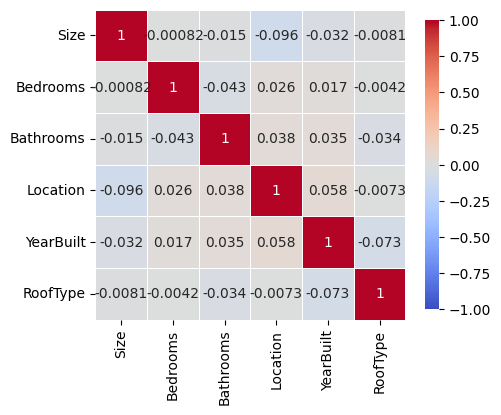

In [ ]:
correlation = df.drop('Price', axis=1).corr() # As well the price showed above.
plt.figure(figsize=(5, 5))
sns.heatmap(correlation, cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.5, annot=True, annot_kws={"size": 10}, square=True, cbar_kws={"shrink": 0.75}, linecolor='white')

## Predictive Modeling using Linear Regression

- Split the Data
- Train a Linear Regressor
- Evaluate it on the test set using any metric of your choice

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Question 4:
# Split the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
# Question 5:
# Evaluate the model on the test set
pred = model.predict(X_test)
# Calculate evaluation metrics
r2_score = metrics.r2_score(y_test, pred)
MSE = metrics.mean_squared_error(y_test, pred)
# Print the evaluation metrics
print(f' R2 score is:{r2_score} , Mean squared error is:{MSE}')

 R2 score is:0.9999788915641026 , Mean squared error is:0.24566225870757094


## Predictive Modeling using Logistic Regression

To utilize the same dataset for logistic regression, you need to transform the problem into a classification task. For example, you can introduce a threshold and classify the houses as "expensive" or "affordable" based on whether their prices are above or below the threshold. You can choose the threshold based on your dataset or specific requirements.

Convert the target variable into a binary variable (0 or 1) representing the classes (e.g., 0 for affordable, 1 for expensive). Then, train a logistic regression model using the same features to classify houses as either affordable or expensive based on the chosen threshold.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Question 6:

# Set the median as a threshold to classify houses as "expensive" or "affordable"
threshold = df['Price'].median()

# Transform the problem into a classification task
df["Class"] = df["Price"].apply(lambda x: 1 if x >= threshold else 0)
df2 = df.drop("Price", axis=1)

# Split the data into features (X) and target variable (y)
X2 = df2.drop('Class', axis=1)
y2 = df2['Class']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)



<ipython-input-23-63a1ed4ee5a4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"] = df["Price"].apply(lambda x: 1 if x >= threshold else 0)


In [24]:
# Fit a logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train2, y_train2)

LogisticRegression()

In [25]:
# Make predictions on the test set
y_pred2 = classifier.predict(X_test)
# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test2, y_pred2)
precision = metrics.precision_score(y_test2, y_pred2)
recall = metrics.recall_score(y_test2, y_pred2)
f1 = metrics.f1_score(y_test2, y_pred2)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9861111111111112
Precision: 0.9864864864864865
Recall: 0.9864864864864865
F1 score: 0.9864864864864865
